In [9]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import pickle

In [10]:
# Create a df with holidays
from workalendar.europe import Belgium
cal = Belgium()

In [11]:
data5 = pd.read_pickle('Building-5-Copro VZW/building_5_cnsumptions.pkl')
data5.index = pd.to_datetime(data5.index)
data5['Datetime'] = data5.index
data5

,Valeur,Datetime
Date,,
2014-01-06 02:00:00,0.0,2014-01-06 02:00:00
2014-01-06 02:15:00,0.0,2014-01-06 02:15:00
2014-01-06 02:30:00,0.0,2014-01-06 02:30:00
2014-01-06 02:45:00,0.0,2014-01-06 02:45:00
2014-01-06 03:00:00,0.0,2014-01-06 03:00:00
...,...,...
2020-06-30 23:00:00,0.0,2020-06-30 23:00:00
2020-06-30 23:15:00,0.0,2020-06-30 23:15:00
2020-06-30 23:30:00,0.0,2020-06-30 23:30:00


In [12]:
data5['working day'] =  data5['Datetime'].apply(cal.is_working_day)
data5

,Valeur,Datetime,working day
Date,,,
2014-01-06 02:00:00,0.0,2014-01-06 02:00:00,True
2014-01-06 02:15:00,0.0,2014-01-06 02:15:00,True
2014-01-06 02:30:00,0.0,2014-01-06 02:30:00,True
2014-01-06 02:45:00,0.0,2014-01-06 02:45:00,True
2014-01-06 03:00:00,0.0,2014-01-06 03:00:00,True
...,...,...,...
2020-06-30 23:00:00,0.0,2020-06-30 23:00:00,True
2020-06-30 23:15:00,0.0,2020-06-30 23:15:00,True
2020-06-30 23:30:00,0.0,2020-06-30 23:30:00,True


In [13]:
data5.to_pickle('./building5_holidays.pkl')
data5.tail()

,Valeur,Datetime,working day
Date,,,
2020-06-30 23:00:00,0.0,2020-06-30 23:00:00,True
2020-06-30 23:15:00,0.0,2020-06-30 23:15:00,True
2020-06-30 23:30:00,0.0,2020-06-30 23:30:00,True
2020-06-30 23:45:00,0.0,2020-06-30 23:45:00,True
2020-01-07 00:00:00,0.0,2020-01-07 00:00:00,True


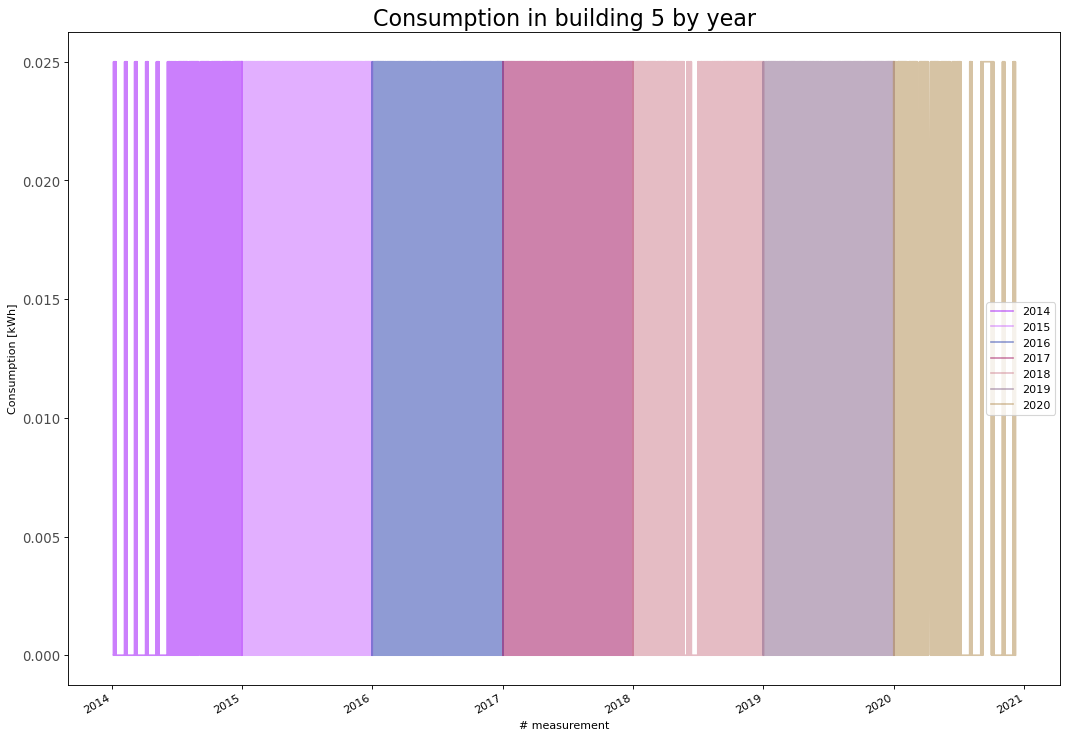

In [17]:
years = data5.index.year.unique()

# Prep Colors
np.random.seed(100)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False) 

# Draw Plot
fig, ax = plt.subplots(figsize=(16,12), dpi= 80)
for i,year in enumerate(years):
        data_temp=data5.loc[data5.index.year==year, :]
        data_temp.plot(y='Valeur', use_index=True, color=mycolors[i], label = year, ax=ax, alpha=0.5)

# Decoration
plt.gca().set(ylabel='Consumption [kWh]', xlabel='# measurement')
plt.yticks(fontsize=12, alpha=.7)
plt.title("Consumption in building 5 by year", fontsize=20)
plt.show()

<AxesSubplot:xlabel='Date'>

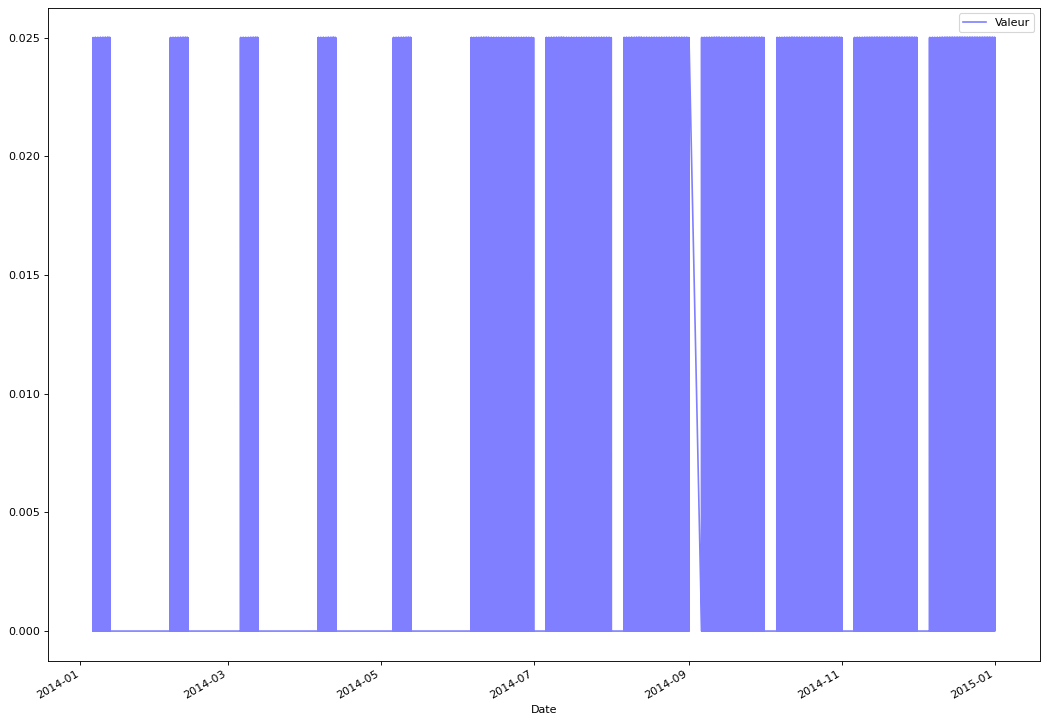

In [16]:
fig, ax = plt.subplots(figsize=(16,12), dpi= 80)
data_temp=data5.loc[data5.index.year==2014, :]
data_temp.plot(y='Valeur', use_index=True, color='b', ax=ax, alpha=0.5)
